## Ensemble learning

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

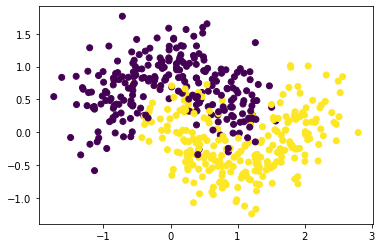

In [4]:
X,y = make_moons(n_samples = 500, noise=0.3, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn

In [7]:
model_1 = dt(random_state=42)
model_2= knn(n_neighbors = 2)
model_3 = lr()

for model in(model_1, model_2, model_3) : 
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

          

DecisionTreeClassifier 0.8533333333333334
KNeighborsClassifier 0.8533333333333334
LogisticRegression 0.86


In [8]:
from sklearn.ensemble import VotingClassifier

In [9]:
model_4 = VotingClassifier([('DTree', model_1),
                             ('LogReg', model_3),
                             ('KNN', model_2)],
                           voting = 'soft')
model_4.fit(X_train, y_train)
print(model_4.__class__.__name__, model.score(X_test, y_test))

VotingClassifier 0.86


### Bagging

In [10]:
from sklearn.ensemble import BaggingClassifier as bg, RandomForestClassifier as rf

In [11]:
model_5 = bg(base_estimator= knn(), n_estimators=100)
model_5.fit(X_train, y_train)
model_5.score(X_test, y_test)

0.9

In [12]:
model_6 = rf(n_estimators=100)
model_6.fit(X_train, y_train)
model_6.score(X_test, y_test)

0.8866666666666667

### Boosting

In [40]:
from sklearn.ensemble import AdaBoostClassifier as Ada, GradientBoostingClassifier as GB

In [41]:
model_7 = Ada(n_estimators = 100) #par défaut le base estimator est un arbre de decision
model_7.fit(X_train, y_train)
model_7.score(X_test, y_test)

0.9

In [42]:
model_8 = GB(n_estimators = 100)
model_8.fit(X_train, y_train)
model_8.score(X_test, y_test)

0.8866666666666667

### Stacking

In [43]:
from sklearn.ensemble import StackingClassifier as ST

In [44]:
model_9 = ST([('DTree', model_1),
              ('LogReg', model_3),
              ('KNN', model_2)],
            final_estimator = knn())
model_9.fit(X_train, y_train)
model_9.score(X_test, y_test)

0.8866666666666667